### Import libraries for data processing

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns  
import matplotlib.pylab as plt
from sklearn.preprocessing import  LabelEncoder
sns.set()

In [2]:
df = pd.read_csv ('heart.csv')

In [3]:
df.rename(columns= {'sex' : 'Gender' , 'num' :'class' },inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   Gender    920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  class     920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


# view sample of data

In [5]:
df.sample(5)

,id,age,Gender,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,class
245,246,67,Male,Cleveland,asymptomatic,120.0,237.0,False,normal,71.0,False,1.0,flat,0.0,normal,2
550,551,56,Male,Hungary,asymptomatic,150.0,213.0,True,normal,125.0,True,1.0,flat,NaN,NaN,1
472,473,56,Male,Hungary,non-anginal,130.0,276.0,False,normal,128.0,True,1.0,upsloping,NaN,fixed defect,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
393,394,48,Female,Hungary,atypical angina,NaN,308.0,False,st-t abnormality,NaN,NaN,2.0,upsloping,NaN,NaN,0


In [6]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,class
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


# view null values , and drop some features. 

<Axes: >

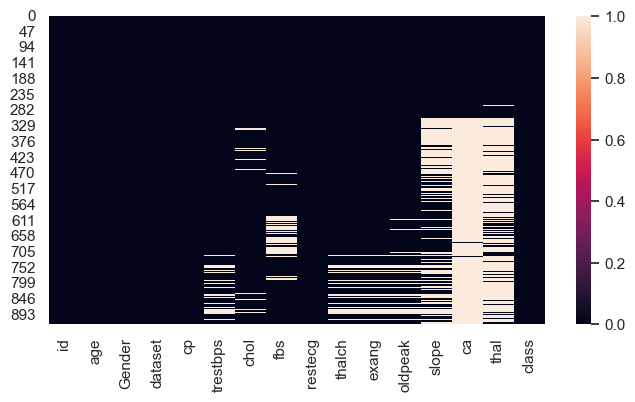

In [7]:
plt.figure(figsize=(8,4))
sns.heatmap(df.isna() )

In [8]:
df.drop(['id','ca','thal' ,'slope' ] ,axis=1 ,inplace=True)

In [9]:
df['trestbps'].describe()

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

In [10]:
df.head()

,age,Gender,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,class
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,0


In [11]:
df.dataset.unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [12]:
df.duplicated().sum()

2

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.sample(5)

,age,Gender,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,class
561,49,Male,Hungary,asymptomatic,130.0,341.0,False,normal,120.0,True,1.0,1
417,50,Male,Hungary,asymptomatic,140.0,129.0,False,normal,135.0,False,0.0,0
452,54,Male,Hungary,atypical angina,120.0,238.0,False,normal,154.0,False,0.0,0
543,53,Male,Hungary,asymptomatic,120.0,246.0,False,normal,116.0,True,0.0,1
903,56,Male,VA Long Beach,asymptomatic,130.0,203.0,True,normal,98.0,False,1.5,1


#  Missing values 

### advance technique for missing value using (group by) -- >  mean , median

In [15]:
def catgr(x) : 
    if x < 30 :
        return '0-30'
    elif x<40 :
        return '30-40' 
    elif x< 50 :
        return '40-50' 
    elif x<60 :
        return '50-60' 
    elif x<70 :
        return '60-70' 
    else : 
        return '70-80'

df.age = df.age.apply( lambda x :catgr(x) )

In [16]:
df.pivot_table(index= 'age' ,columns='Gender',values='trestbps' ,aggfunc=np.mean )

Gender,Female,Male
age,,
0-30,NaN,130.000000
30-40,120.947368,124.545455
40-50,126.686275,127.467949
50-60,134.069444,133.320285
60-70,140.418605,136.033113
70-80,133.666667,142.619048


In [17]:
df['trestbps'] = df['trestbps'] .fillna( df.groupby(['age' ,'Gender'])['trestbps'].transform(np.mean)).round(2)

In [18]:
df['thalch'].fillna(df['thalch'].mean().round(2),inplace=True)

In [19]:
df['restecg'].fillna('normal',inplace=True)

In [20]:
df['oldpeak'] = df['oldpeak'] .fillna( df.groupby('class')['oldpeak'].transform(np.mean)).round(2)

Normal cholesterol level is a measure of the fat-like substance in the cells and some foods1. Normal cholesterol level varies by age, weight, and gender1. For adults, normal cholesterol level is usually less than 200 mg/dL2345. For children, normal cholesterol level is usually less than 170 mg/dL23. Normal cholesterol level can be divided into total, LDL, and HDL cholesterol23. LDL is bad cholesterol and HDL is good cholesterol23. Normal LDL level is less than 100 mg/dL for adults and less than 110 mg/dL for children23. Normal HDL level is greater than 40 mg/dL for adults and greater than 45 mg/dL for children2

In [21]:
df.groupby(['age' ,'Gender'])['chol'].mean().round(2)

age    Gender
0-30   Male      193.00
30-40  Female    185.05
       Male      208.78
40-50  Female    234.28
       Male      214.34
50-60  Female    265.31
       Male      184.68
60-70  Female    241.16
       Male      163.39
70-80  Female    197.00
       Male      187.09
Name: chol, dtype: float64

In [22]:
df['chol'] = df['chol'] .fillna( df.groupby(['age' ,'Gender'])['chol'].transform(np.mean)).round(2)

In [23]:
Dict_toFill=dict(df.groupby(['age' ,'Gender' ,'class' ])['exang'].describe().sort_values(by ='count',ascending=False).top)


In [24]:
df['exang'].fillna( df.apply(lambda x : Dict_toFill[(x.age,x.Gender,x['class'])] , axis=1 ),inplace=True )

In [25]:
df.fbs.value_counts()

False    690
True     138
Name: fbs, dtype: int64

In [26]:
df.fbs.fillna(False,inplace=True)  

In [27]:
df.head()

,age,Gender,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,class
0,60-70,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,0
1,60-70,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,2
2,60-70,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,1
3,30-40,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,0
4,40-50,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,0


C:\Users\Odai\AppData\Local\Temp\ipykernel_8360\550407521.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

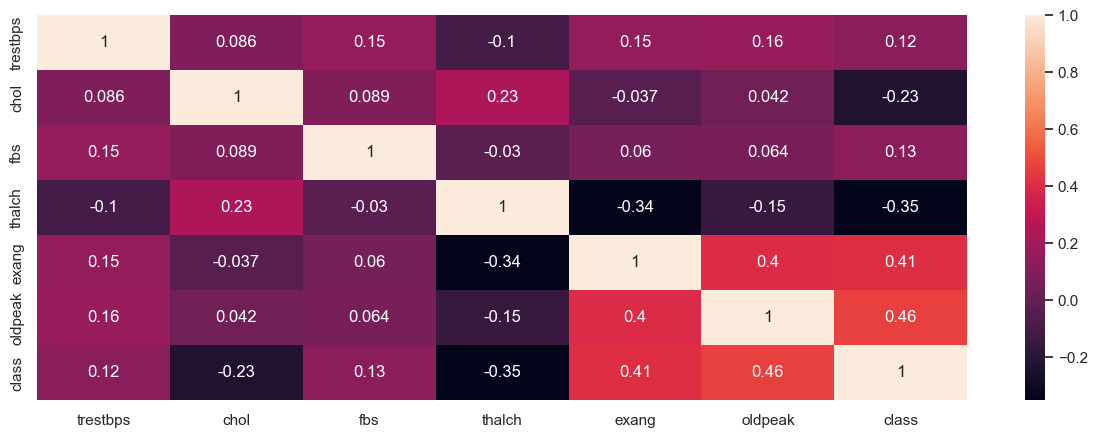

In [28]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)

### Transformation 

In [29]:
en  =  LabelEncoder() 

In [30]:
df.head(2)

,age,Gender,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,class
0,60-70,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,0
1,60-70,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,2


<Axes: >

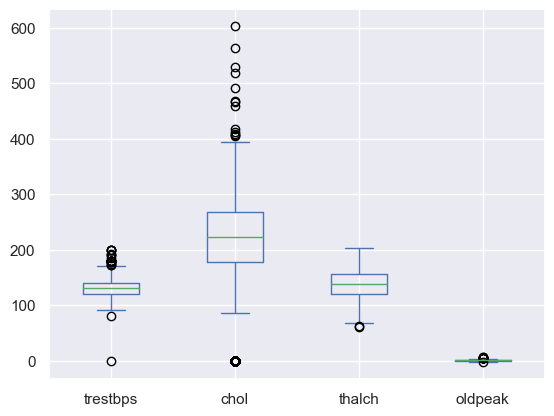

In [31]:
df.iloc[:,:-1].plot.box()

In [32]:
df.Gender = en.fit_transform(df.Gender)
df.dataset = en.fit_transform(df.dataset)
df.cp = en.fit_transform(df.cp)
df.fbs = en.fit_transform(df.fbs)
df.restecg = en.fit_transform(df.restecg)
df.exang = en.fit_transform(df.exang) 
 
df.age = en.fit_transform(df.age) 


In [33]:
df.head()

,age,Gender,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,class
0,4,1,0,3,145.0,233.0,1,0,150.0,0,2.3,0
1,4,1,0,0,160.0,286.0,0,0,108.0,1,1.5,2
2,4,1,0,0,120.0,229.0,0,0,129.0,1,2.6,1
3,1,1,0,2,130.0,250.0,0,1,187.0,0,3.5,0
4,2,0,0,1,130.0,204.0,0,0,172.0,0,1.4,0


In [34]:
df.head(2)

,age,Gender,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,class
0,4,1,0,3,145.0,233.0,1,0,150.0,0,2.3,0
1,4,1,0,0,160.0,286.0,0,0,108.0,1,1.5,2


## Outlier

<Axes: >

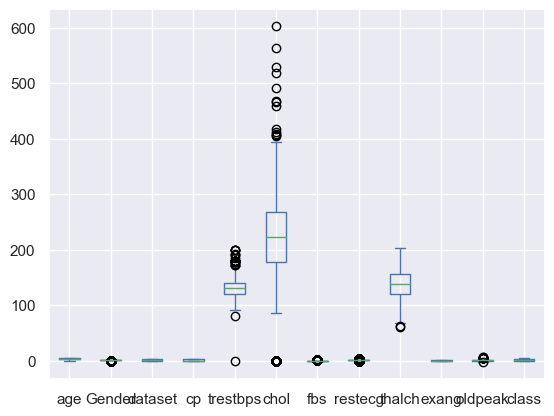

In [35]:

df.plot.box()


<Axes: >

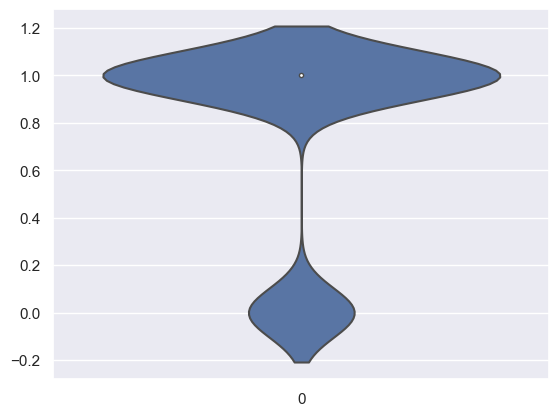

In [36]:
sns.violinplot(df.Gender) 
# Here no need to handel it  becuse  we think there is  no meaning whene deltet our  change the outliyer
# any nomainl data we leave as it

In [37]:
df.head()

,age,Gender,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,class
0,4,1,0,3,145.0,233.0,1,0,150.0,0,2.3,0
1,4,1,0,0,160.0,286.0,0,0,108.0,1,1.5,2
2,4,1,0,0,120.0,229.0,0,0,129.0,1,2.6,1
3,1,1,0,2,130.0,250.0,0,1,187.0,0,3.5,0
4,2,0,0,1,130.0,204.0,0,0,172.0,0,1.4,0


In [38]:
def get_quartiles(data):
    # Sort the data in ascending order
    sorted_data = sorted(data)
    n = len(sorted_data)

    # Calculate the quartiles
    q1_index = int(n * 0.25)
    q2_index = int(n * 0.5)
    q3_index = int(n * 0.75)

    q1 = sorted_data[q1_index]
    q2 = sorted_data[q2_index]
    q3 = sorted_data[q3_index]

    # Calculate the interquartile range (IQR)
    iqr = q3 - q1

    # Calculate the upper and lower fences
    upper_fence = q3 + 1.5 * iqr
    lower_fence = q1 - 1.5 * iqr

    # Create a dictionary to store the results
    result = {
        'Q1': q1,
        'Q2': q2,
        'Q3': q3,
        'Upper Fence': upper_fence,
        'Lower Fence': lower_fence,
        'IQR': iqr
    }

    return result

###  handle outliers using upper and lower fence

In [39]:
get_quartiles(df.trestbps)

{'Q1': 120.0,
 'Q2': 130.0,
 'Q3': 140.0,
 'Upper Fence': 170.0,
 'Lower Fence': 90.0,
 'IQR': 20.0}

In [40]:
df.trestbps = df.trestbps.apply(lambda x :  170 if x >get_quartiles(df.trestbps)['Upper Fence'] else 90 if x <90 else x )

In [41]:
get_quartiles(df.chol)

{'Q1': 177.0,
 'Q2': 222.0,
 'Q3': 267.0,
 'Upper Fence': 402.0,
 'Lower Fence': 42.0,
 'IQR': 90.0}

In [42]:
df.chol =df.chol.apply(lambda x :  402 if x >402  else 42.0 if x <42.0 else x )

In [43]:
get_quartiles(df.thalch)

{'Q1': 120.0,
 'Q2': 138.0,
 'Q3': 156.0,
 'Upper Fence': 210.0,
 'Lower Fence': 66.0,
 'IQR': 36.0}

In [44]:
df.thalch = df.thalch.apply(lambda x :  210.0 if x >210.0  else 67 if x <66.0 else x )

In [45]:
get_quartiles(df.oldpeak)

{'Q1': 0.0,
 'Q2': 0.6,
 'Q3': 1.5,
 'Upper Fence': 3.75,
 'Lower Fence': -2.25,
 'IQR': 1.5}

In [46]:
df.oldpeak = df.oldpeak.apply(lambda x :  3.75 if x >3.75  else -2.25 if x <-2.25 else x )

<Axes: >

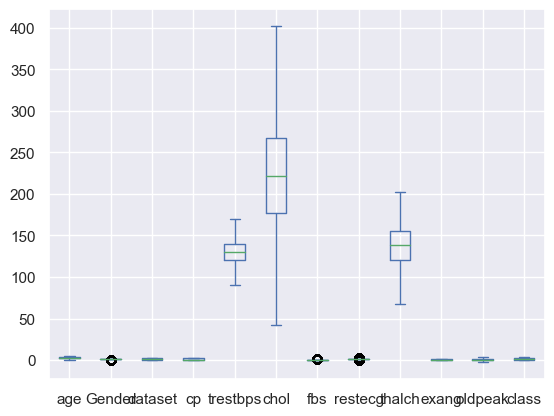

In [47]:
df.plot.box()

### There is a muiltple Class (0 ,1,2,3,4 ) where [ 0=no heart disease; 1,2,3,4 = stages of heart disease ]

### when we look closer, the number of data is few (918) and there 5 class and the class number 3 and 4 have a litle record so 
### we deside to transfome our task to prdeict if the Patients has  heart disease or not

In [48]:
df['class'].value_counts().values

array([410, 265, 108, 107,  28], dtype=int64)

[Text(0, 0, 'Class 0'), Text(1, 0, 'class 1')]

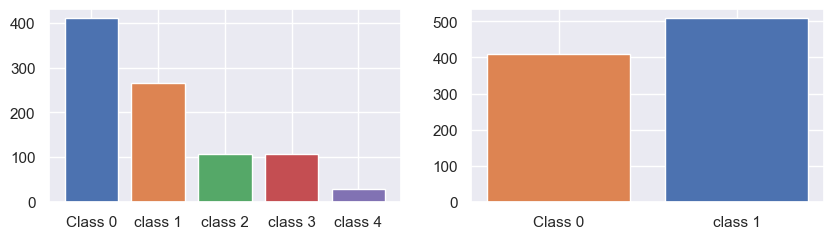

In [49]:
fig, axs = plt.subplots(1,2 ,figsize=(10,2.5),)
default_palette = list(sns.color_palette())
axs[0].bar(x=df['class'].value_counts().index ,height= df['class'].value_counts().values , color =default_palette)
axs[0].set_xticks([0 ,1,2,3,4])
axs[0].set_xticklabels(['Class 0' ,'class 1','class 2' , 'class 3' ,'class 4'])

df['class'] = df['class'].apply(lambda x : 0 if x==0 else 1)


axs[1].bar(x=df['class'].value_counts().index ,height= df['class'].value_counts().values,color =default_palette)
axs[1].set_xticks([0 ,1])
axs[1].set_xticklabels(['Class 0' ,'class 1'])

In [50]:
df.head()

,age,Gender,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,class
0,4,1,0,3,145.0,233.0,1,0,150.0,0,2.3,0
1,4,1,0,0,160.0,286.0,0,0,108.0,1,1.5,1
2,4,1,0,0,120.0,229.0,0,0,129.0,1,2.6,1
3,1,1,0,2,130.0,250.0,0,1,187.0,0,3.5,0
4,2,0,0,1,130.0,204.0,0,0,172.0,0,1.4,0


### Save our Works in a new csv File

In [51]:
df.to_csv("Heart deises cleand.csv",index=False) 